<class 'pandas.core.frame.DataFrame'>
Index: 68041 entries, 138 to 75450
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           68041 non-null  object 
 1   disease          68041 non-null  object 
 2   age              68041 non-null  object 
 3   year             68041 non-null  int64  
 4   cases            68041 non-null  float64
 5   region_standard  68041 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.6+ MB
None

Пропуски по колонкам:
 region             0
disease            0
age                0
year               0
cases              0
region_standard    0
dtype: int64

Уникальных регионов: 85
Уникальных лет: 12
Уникальных диагнозов: 19
Уникальных возрастных групп: ['0-14 лет' '15-17 лет' '18 лет и старше' 'Всего']

Количество дубликатов: 0

Статистика cases:
 count     68041.000000
mean      13200.240573
std       33840.782400
min           0.000000
25%       

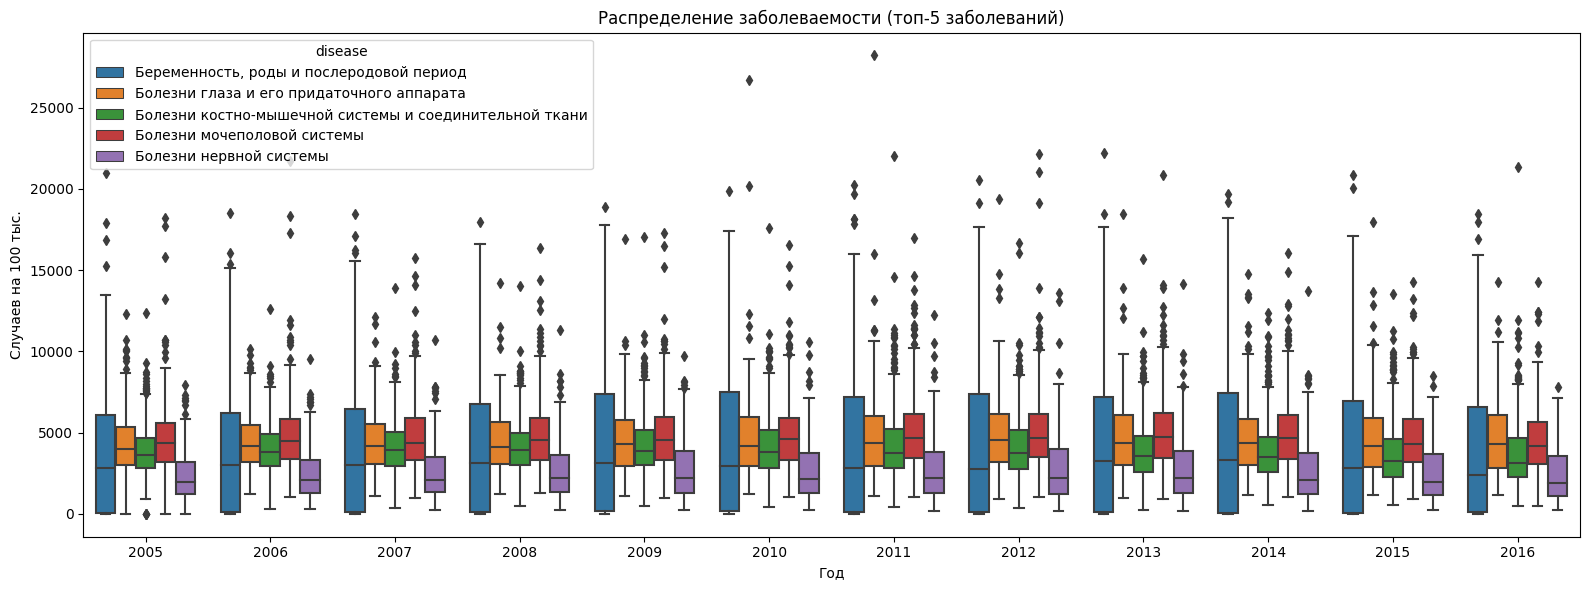

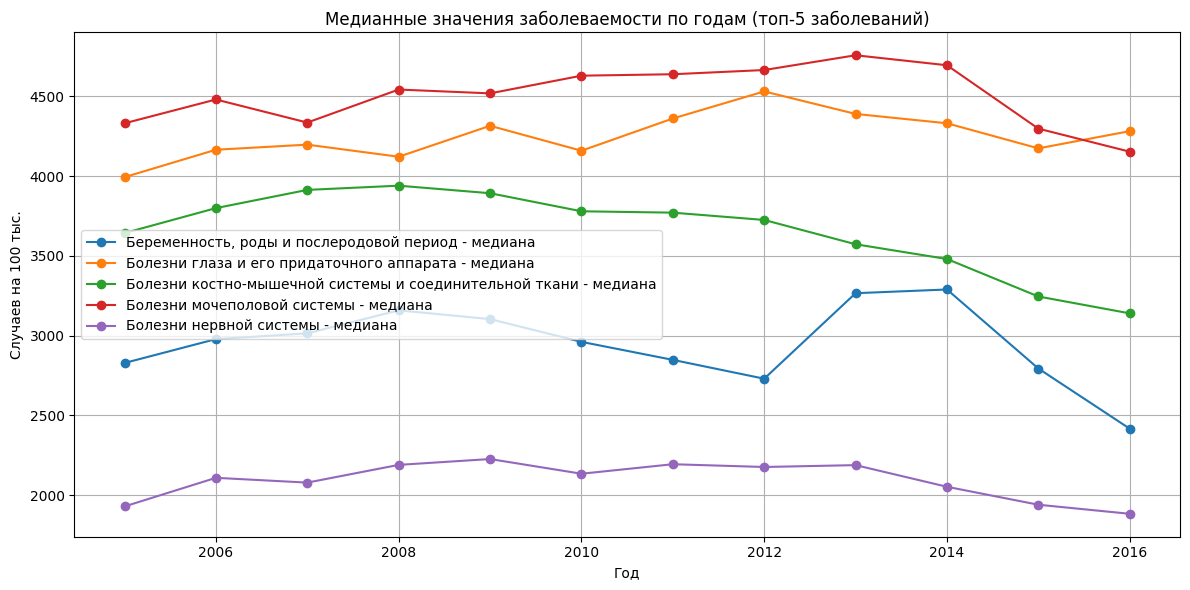

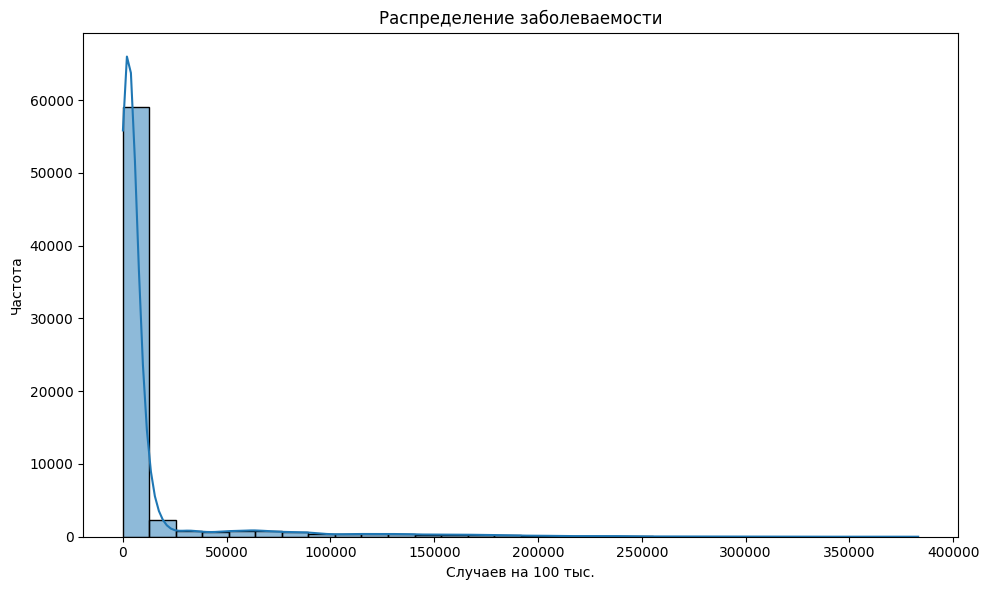

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/morbidity_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Приводим cases в float
df["cases"] = pd.to_numeric(df["cases"], errors="coerce")

# 4. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 5. Уникальные регионы, годы, диагнозы
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["year"].nunique())
print("Уникальных диагнозов:", df["disease"].nunique())
print("Уникальных возрастных групп:", df["age"].unique())

# 6. Проверка дубликатов
duplicates = df.duplicated().sum()
print("\nКоличество дубликатов:", duplicates)

# 7. Статистика по cases
print("\nСтатистика cases:\n", df["cases"].describe())

# 8. Медианы по годам и заболеваниям
median_all = df.groupby(["year", "disease"])["cases"].median().unstack()

# 9. Boxplot по годам и топ-5 заболеваниям
top_diseases = df["disease"].value_counts().head(5).index.tolist()
df_top = df[df["disease"].isin(top_diseases)]

plt.figure(figsize=(16,6))
sns.boxplot(x="year", y="cases", hue="disease", data=df_top)
plt.title("Распределение заболеваемости (топ-5 заболеваний)")
plt.xlabel("Год")
plt.ylabel("Случаев на 100 тыс.")
plt.tight_layout()
plt.show()

# 10. График медианных значений по годам
plt.figure(figsize=(12,6))
for diag in top_diseases:
    med = median_all[diag].dropna()
    plt.plot(med.index, med.values, marker="o", label=f"{diag} - медиана")
plt.title("Медианные значения заболеваемости по годам (топ-5 заболеваний)")
plt.xlabel("Год")
plt.ylabel("Случаев на 100 тыс.")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Гистограмма по значениям
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="cases", bins=30, kde=True)
plt.title("Распределение заболеваемости")
plt.xlabel("Случаев на 100 тыс.")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `morbidity_standardized.csv`

**Описание данных**
- 68 041 запись по 85 регионам.
- Период: 2005–2016.
- 19 диагнозов, 4 возрастные группы.

---

**Типы данных**
- Все признаки корректны.
- `cases` приведён к float.

---

**Пропуски**
- Отсутствуют.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Среднее: ~13 200 случаев.
- Медиана: ~3 011.
- Мин: 0.
- Макс: ~383 126.
- Сильный разброс значений.

---

**Визуализации**
- Boxplot по годам (топ-5 диагнозов).
- График медиан по годам.
- Гистограмма распределения.

---

**Вывод**
- Данные чистые и готовы к дальнейшему анализу.
- При интерпретации важно учитывать сильное смещение распределения.


In [4]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/morbidity_AfterEDA.csv", index=False)